In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Create trajectory utils methods

In [9]:
# Generate 2d zig_zag path
def generate_zig_zag_path(x_start, y_start, n_points, x_d): 
    
    pts = [(x_start, y_start)]
    for i in range(0, n_points):
        pt_ = (x_start+i*x_d, (-1)**i*y_start)
        pts.append(pt_)
    return np.array(pts)


def Linear_waypoints(ps, pg, n, Tmax = 2*np.pi):
    
    t = np.linspace(0, Tmax, n)
    x = np.linspace(ps[0], pg[0], n)
    y = np.linspace(ps[1], pg[1], n)
    z = np.linspace(ps[2], pg[2], n)

    return np.stack((x, y, z), axis=-1)

In [12]:
pts = generate_zig_zag_path(1, 0.1, 10, 0.5)

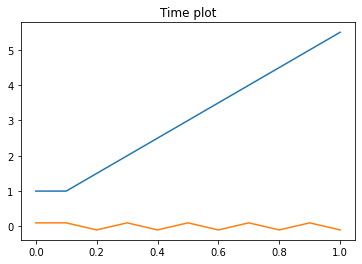

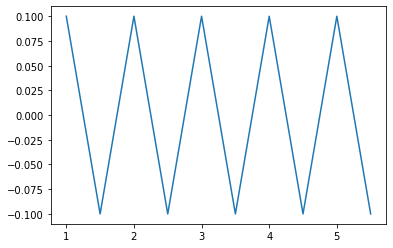

In [15]:
plt.figure()
t_param = np.linspace(0, 1, pts.shape[0])
plt.plot(t_param, pts[:, 0])
plt.plot(t_param, pts[:, 1])
plt.title("Time plot")

plt.figure()
plt.plot(pts[:, 0], pts[:, 1])

In [19]:


wpts = []
for i, wp in enumerate(pts):
    print(pts[i])
    if i < len(pts)-1:
        z_const = 0.5
        start = np.array( [pts[i][0], pts[i][1], z_const] )
        goal = np.array( [pts[i+1][0], pts[i+1][1], z_const] )
        waypoints = Linear_waypoints(start, goal, 5)
    wpts.append(waypoints)

for i, wp in enumerate(wpts): 
    if i == 0:
        pass
    else: 
        waypoints = np.vstack((waypoints, wp))

[1.  0.1]


NameError: name 'Linear_waypoints' is not defined